## Final Project Submission

Please fill out:
* Student name: Sanjeev Patil
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Import Python Libraries
- Pandas: Data analysis library 
- Numpy: Scientific computing library
- Matplotlib: Plotting Library
- Seaborn: Plotting library 

Distribution of Votes

In [5]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import seaborn as sns  # Alias seaborn to be referred to as sns

# To store plot output in this notebook
%matplotlib inline

Read Input Data: 

The first step for data analysis here is to read in the data from the project folder using the python libraries sucha s pandas and access all the data inside the files for analysis.  Using pandas we can readin the data files using the .read_csv() method.

In [6]:
df_rating=pd.read_csv('imdb.title.ratings.csv', index_col=0)
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


Clean data

First begin cleaning the input data using the info() and head() method to see the details of the data that is read in. The Data cleaning methods here apply to all the data frames used in this analysis. The following methods shows the details of data cleaning for each of the files read.

In [7]:
df_rating.head(10)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
tt1069246,6.2,326
tt1094666,7.0,1613
tt1130982,6.4,571
tt1156528,7.2,265


In [8]:
# Show the overall shape of the data
df_rating.shape

(73856, 2)

In [9]:

df_rating.isnull().values.any()

False

This data set has bno missing values.

In [10]:
df_rating.duplicated().values.any()

True

In [11]:

df_rating.duplicated().values.sum()

45074

This data set is showing duplicate values. This may suggest that the rating may have been the same for some movie titles and the program may use that as a duplicate value. Therefore the rating values are used as is.The below command shows the first 10 values

In [71]:
df_rating.head(10)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
tt1069246,6.2,326
tt1094666,7.0,1613
tt1130982,6.4,571
tt1156528,7.2,265


Looking at the dataframes by their columns, it appears that IMDB (International Movie Database) contain a more complete picture of movies when put together with other data files imdb.title.basics and bom.movie_gross.csv Once we join the columns of different files, the movie dataframe can be renamed

In [13]:
df_titles=pd.read_csv("imdb.title.basics.csv")
df_titles.info()
df_titles.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [14]:
#checking null values
df_titles.isnull().values.any()

True

In [15]:
# checking missing values.
df_titles.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

original_title is not a column we are particularly interested in, because we will only use one title per film, lets only use the primary_title which was given upon release and drop this column.

In [16]:
# Drop the redundant title column.
type(df_titles)
df_titles = df_titles.drop('original_title', axis=1)

In [17]:
# Again we check that everything has worked as expected.
df_titles.isnull().sum()

tconst                 0
primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [18]:
# Drop those missing values in the genres column.
df_titles = df_titles.dropna(subset=['genres'])
df_titles.isnull().sum()

tconst                 0
primary_title          0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

Total runtime for missing data is 28503 minutes which is very significant. We can fill the missing value with median value using .fillna() method. The median value can be found using median() function

In [19]:
runtime_median=df_titles['runtime_minutes'].median()
runtime_median

87.0

In [20]:
# Fill the missing valules with the median of runtime minutes, and set inplace
# to true to apply this for all missing values and save changes to df.
df_titles['runtime_minutes'].fillna(
    value=runtime_median, inplace=True)

In [21]:
# We can check that this has eliminated our missing runtime minute values.
df_titles.isnull().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [22]:
# check duplicate values.
df_titles.duplicated().values.any()
# sum of duplicate values
df_titles.duplicated().sum()

0

In [23]:
# Review our dataframe once more to confirm all changes have been applied.
df_titles.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Next we will read in movie gross file to get the details about the movie financial performance

In [24]:
df_movie_gross=pd.read_csv("bom.movie_gross.csv")
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
df_movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


Check for any missing values

In [26]:
# missing values?.
df_movie_gross.isnull().values.any()

True

In [27]:
#Sum of missing values?
df_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Studio, domestic_gross and foreign gross columns show missing values. Foreign gross shows significant sum value which indicates more number of missing values.  Using  .dropna() method we can drop the missing values in studio and we can drop the entire foreign gross column since our analysis focuses on domestic gross values

In [28]:
# Make a new dataframe without these null values but with same name as original.
df_movie_gross= df_movie_gross.dropna(subset=['studio'])

When dropping rows from a dataset, it's best practice to check that the method worked smoothly and there are no remaining null values in the specified column. Let's check for this now.

In [29]:
# Get total of null values in entire dataframe.
df_movie_gross.isnull().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In deleting the missing values in studio coulmn will delete some values in other columns but it is not significant. Similarly drop null values in domestic gross

In [30]:
# Drop null values from the domestic gross column
df_movie_gross= df_movie_gross.dropna(subset=['domestic_gross'])

In [31]:
# Let's check to make sure that the changes have occurred.
df_movie_gross.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

Delete the entire foreign gross column

In [32]:
# Drop the foreign gross column from the dataframe
df_movie_gross = df_movie_gross.drop('foreign_gross', 1)

In [33]:
# Check that the foreign gross column has been dropped.
df_movie_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

We no longer have any missing values in this dataframe, now let's make sure there are no duplicate values in the dataframe using the .duplicated() method.

In [34]:
# Return a boolean stating if any values that are duplicated.
df_movie_gross.duplicated().values.any()

False

Great, this dataset has been cleaned and we can take a look to see how films have performed in the domestic_gross category

In [35]:
# View first 25 rows of dataframe.
df_movie_gross.head(10)

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010
6,Iron Man 2,Par.,312400000.0,2010
7,Tangled,BV,200800000.0,2010
8,Despicable Me,Uni.,251500000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,2010


Looking at the year column it appears that the all the movies are released in the year 2010. This may not be useful dataset if athe year contains only one year. To obtain the overall information about the movie release year we can use unique() function.

In [36]:
# Return an array of all the various values found in the year column.
df_movie_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [37]:
# Now change the index from tconst to movie with the set_index method. Set index
# to true so that the changes are saved in the dataframe.
df_movie_gross.set_index('title', inplace=True)
# Ensure the changes have taken place.
df_movie_gross.head()

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010


Merge data frames

In [38]:
df_merge1=pd.merge(df_titles,df_rating,on='tconst')

In [48]:
# View the new dataframe.
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73052 non-null  object 
 1   start_year       73052 non-null  int64  
 2   runtime_minutes  73052 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73052 non-null  float64
 5   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


In [49]:
df_merge1.head(10)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,2010,136.0,Drama,6.8,451
8,So Much for Justice!,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [52]:
#df_merge2=df_merge1.drop(['tconst'],axis=1)
df_merge1.set_index('primary_title', inplace=True)
df_merge1.head(10)

,start_year,runtime_minutes,genres,averagerating,numvotes
primary_title,,,,,
Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
The Other Side of the Wind,2018,122.0,Drama,6.9,4517
Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
Pál Adrienn,2010,136.0,Drama,6.8,451
So Much for Justice!,2010,100.0,History,4.6,64


Merge df_merge1 and df_movie_gross based on title

In [53]:
df_movies=pd.merge(df_merge1, df_movie_gross, left_index=True,right_on='title')

In [54]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, Wazir to Burn the Stage: The Movie
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_year       2997 non-null   int64  
 1   runtime_minutes  2997 non-null   float64
 2   genres           2997 non-null   object 
 3   averagerating    2997 non-null   float64
 4   numvotes         2997 non-null   int64  
 5   studio           2997 non-null   object 
 6   domestic_gross   2997 non-null   float64
 7   year             2997 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 210.7+ KB


In [55]:
df_movies.head(10)

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
title,,,,,,,,
Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,2016
On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,2012
On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,2012
On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,2012
The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013
A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015
Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,2015
Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,2015


In [56]:
# Order the dataframe by the highest to lowest  domestic gross values.
df_movies = df_movies.sort_values(by=['domestic_gross'], ascending=False)
# Check the changes.
df_movies.head(10)

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
title,,,,,,,,
Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,BV,700100000.0,2018
Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015
Star Wars: The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,BV,620200000.0,2017
Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,BV,608600000.0,2018
Rogue One: A Star Wars Story,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,BV,532200000.0,2016
Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542,BV,486300000.0,2016
Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015
The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,WB,448100000.0,2012


Looking for duplicated values after the merge function.Use label based indexing to keep only the first rows with duplicate indexes

In [57]:
#Use label based indexing to keep only the first rows with duplicate indexes,
df_movies = df_movies.loc[~df_movies.index.duplicated(keep='first')]
# Check that changes took place
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, Black Panther to Storage 24
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_year       2580 non-null   int64  
 1   runtime_minutes  2580 non-null   float64
 2   genres           2580 non-null   object 
 3   averagerating    2580 non-null   float64
 4   numvotes         2580 non-null   int64  
 5   studio           2580 non-null   object 
 6   domestic_gross   2580 non-null   float64
 7   year             2580 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 181.4+ KB


In [58]:
df_movies.head(10)

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
title,,,,,,,,
Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,BV,700100000.0,2018
Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015
Star Wars: The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,BV,620200000.0,2017
Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,BV,608600000.0,2018
Rogue One: A Star Wars Story,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,BV,532200000.0,2016
Finding Dory,2016,97.0,"Adventure,Animation,Comedy",7.3,213542,BV,486300000.0,2016
Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015
The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,WB,448100000.0,2012


Clean data summary

I have used several methods to clean multiple dataframes,

info() and .head() method to view the structural shape of the dataframes including their structure and datatypes, as well as look into the dataframes themselves. Furthermore I have used this information to make informed decisions about how to manage missing and duplicated data.

value.sum() method to know if a dataframe had any missing or duplicated values.

dropna() and .drop_duplicates() to delete missing and duplicated values from the dataframes.

fillna() method in conjunction with the .median() method to fill the missing values with the median value of a particular column of a dataframe.

merge() method to join dataframes with useful data on identical columns 

replace() methods to alter the values within columns. 
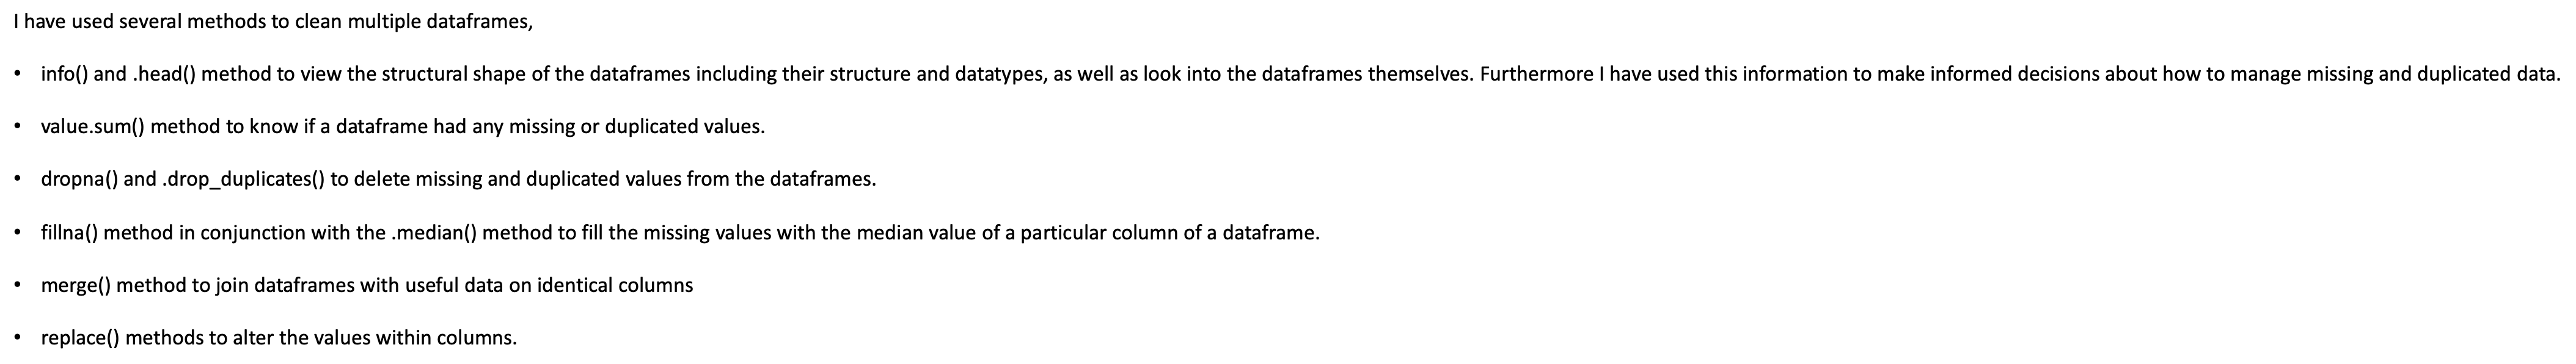

Q1: Study different titles of the movies and find out most popular movie titles to follow

With this dataframe, lets look for patterns that might exist among the top grossing films. Here we will take a look at each of the features through visualizations with matplotlib and seaborn. We can start with genres. Lets explore the genres of the top 100 films by worldwide gross.
s it stands our dataframe will not immediately answer this question, we still need to manage the dataframe a bit. First we should order the dataframe by the worldwide_gross column. We can consider this to be the sum of a film's gross. This ordering is possible with the .sort_values() method, applying it to the worldwide_gross column, and setting ascending to False. We will index this dataframe to limit it to the first 100 rows based on worldwide_gross, however this would in turn change the data type from a dataframe to a list. We will then need to use the pd.DataFrame() method to transform this list back to a pandas dataframe.

In [59]:
# Make new dataframe grouped by number of votes obtained values in descending order
# indexed to only include the first 10 values
df_movies_top10 = df_movies.sort_values(
    by=['numvotes'], ascending=False)[:10]
# Ensure new element will be a pandas dataframe
df_movies_top10 = pd.DataFrame(df_movies_top10)
# View new dataframe
df_movies_top10

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
title,,,,,,,,
Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000.0,2010
The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,WB,448100000.0,2012
Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Par.,188000000.0,2014
Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Wein.,162800000.0,2012
The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,Par.,116900000.0,2013
Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960,Par.,128000000.0,2010
Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394,BV,333200000.0,2014
Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847,Fox,363100000.0,2016
The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,LGF,408000000.0,2012


In [60]:
#  First make a list of all the columns of the dataframe.
cols = list(df_movies_top10.columns)
cols

['start_year',
 'runtime_minutes',
 'genres',
 'averagerating',
 'numvotes',
 'studio',
 'domestic_gross',
 'year']

In [61]:
# Now index those columns that are associated with the genres and assign them a new name.
title_cols = df_movies_top10.index
type(title_cols)

pandas.core.indexes.base.Index

In [62]:
# Now index those columns that are associated with the genres and assign them a new name.
numvotes_cols = df_movies_top10['numvotes'].to_list()
numvotes_cols 

[1841066,
 1387769,
 1299334,
 1211405,
 1035358,
 1005960,
 948394,
 820847,
 795227,
 780910]

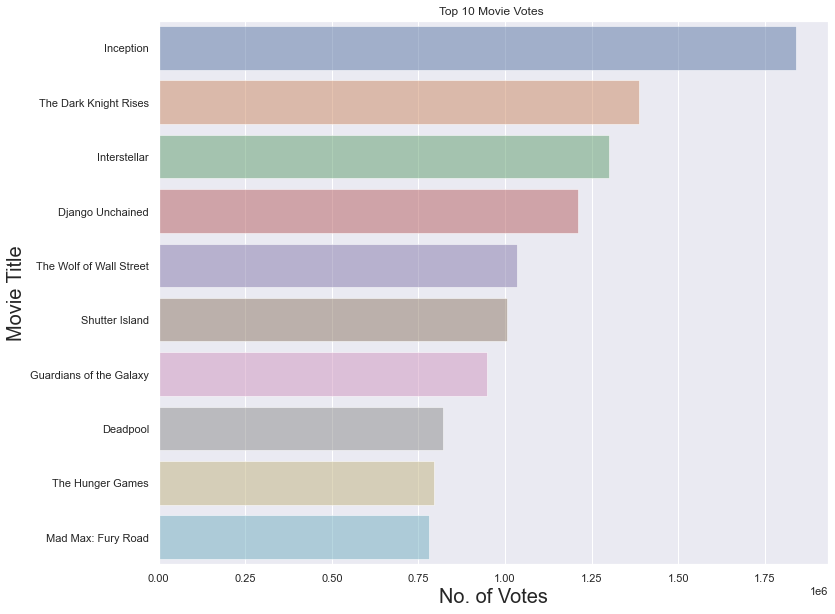

In [68]:
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
#font size
sns.set(font_scale=1)
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = title_cols, x = numvotes_cols, alpha=0.5, palette="deep")
# Set the barplot's title.
plt.title('Top 10 Movie Votes ')
# Label the y-axis
plt.ylabel('Movie Title', fontsize=20)
# Label the x-axis
plt.xlabel('No. of Votes', fontsize=20)

# Show the plot                
plt.show()

The above plot informs us that Adventure and Action films are among the most popular of the highest no. of votes films by a large margin. Lets explore this trend, to compare the average rating of these type of movies. The bar chart shows the top 10 movies with highest number of votes.

Q2: Study highest rating movies and recommend different characteristics for high rated movies

In [66]:
avgrating_cols = df_movies_top10['averagerating'].to_list()
avgrating_cols

[8.8, 8.4, 8.6, 8.4, 8.2, 8.1, 8.1, 8.0, 7.2, 8.1]

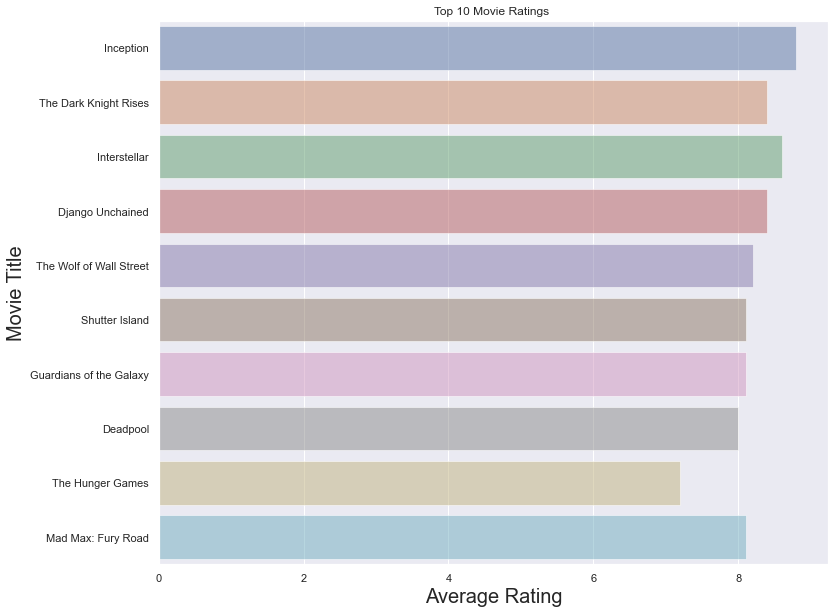

In [67]:
# Draw the seaborn barplot
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
#font size
sns.set(font_scale=1)
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = title_cols, x = avgrating_cols, alpha=0.5, palette="deep")
# Set the barplot's title.
plt.title('Top 10 Movie Ratings ')
# Label the y-axis
plt.ylabel('Movie Title', fontsize=20)
# Label the x-axis
plt.xlabel('Average Rating', fontsize=20)
# Show the plot                
plt.show()

The above plot informs us that Adventure and Action films are among the most popular of the highest of average rating films by a large margin. By exploring this trend this compares with the average rating of these type of movies. The bar chart shows the top 10 movies with highest naverage rating.

Q3: Study trends and patterns for highest grossing film

In [69]:
gross_cols = df_movies_top10['domestic_gross'].to_list()
gross_cols

[292600000.0,
 448100000.0,
 188000000.0,
 162800000.0,
 116900000.0,
 128000000.0,
 333200000.0,
 363100000.0,
 408000000.0,
 153600000.0]

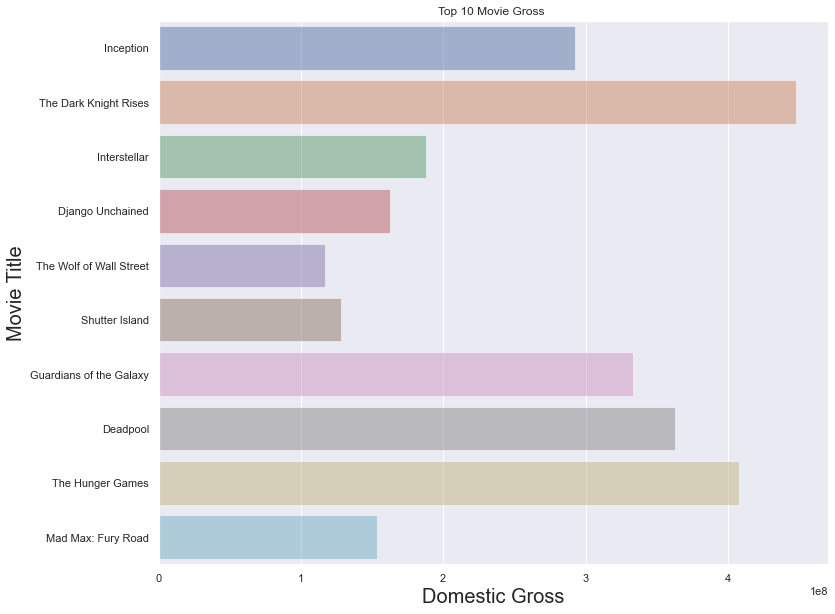

In [70]:
# Draw the seaborn barplot
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
#font size
sns.set(font_scale=1)
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = title_cols, x = gross_cols, alpha=0.5, palette="deep")
# Set the barplot's title.
plt.title('Top 10 Movie Gross ')
# Label the y-axis
plt.ylabel('Movie Title', fontsize=20)
# Label the x-axis
plt.xlabel('Domestic Gross', fontsize=20)
# Show the plot                
plt.show()

The above plot informs us that Adventure and Action films are among the most popular of the highest of domestic grossing films by a large margin. The bar chart shows the top 10 movies with highest naverage rating.